# Random Forest Classification

**Weight Category Prediction**
([source link](https://machinelearningprojects.net/weight-category-prediction/))

In this project, we are going to perform the weight category prediction of a person given height, weight, and gender with the help of the Random Forest algorithm.

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv("data/500_Person_Gender_Height_Weight_Index.csv")
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


## Describing the dataset

In [4]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


## Converting numerical values to categorical values

Create a function to convert numerical values of the Index column to categorical values.

In [5]:
def give_names_to_indices(ind):
    if ind==0:
        return "Extremely Weak"
    elif ind==1:
        return "Weak"
    elif ind==2:
        return "Normal"
    elif ind==3:
        return "OverWeight"
    elif ind==4:
        return "Obesity"
    elif ind==5:
        return "Extremely Obese"

In [6]:
data["Index"] = data["Index"].apply(give_names_to_indices)
data.head()

,Gender,Height,Weight,Index
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,OverWeight
4,Male,149,61,OverWeight


## Visualizing the dataset

### Plotting height vs weight and color them according to their weight category

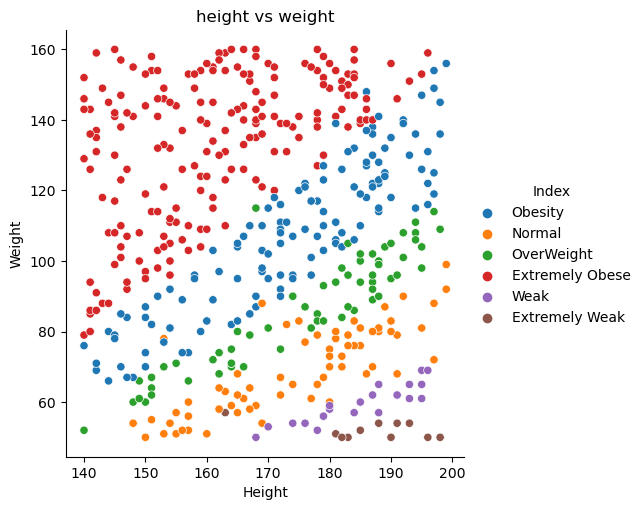

In [7]:
sns.relplot(data, x="Height", y="Weight",hue="Index", aspect=1);
plt.title("height vs weight");

### The value counts of the Gender column.

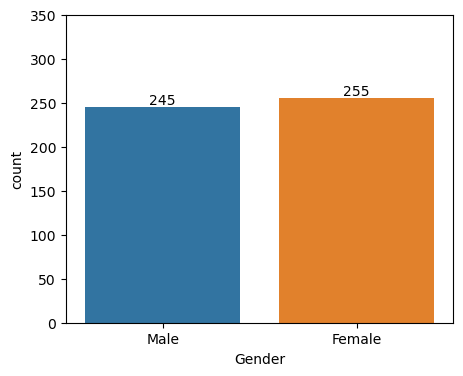

In [7]:
plt.figure(figsize=(5, 4))
ax = sns.countplot(data, x="Gender")
ax.set_ylim([0, 350])
for i in ax.containers:
    ax.bar_label(i)

### The value counts of the Index column

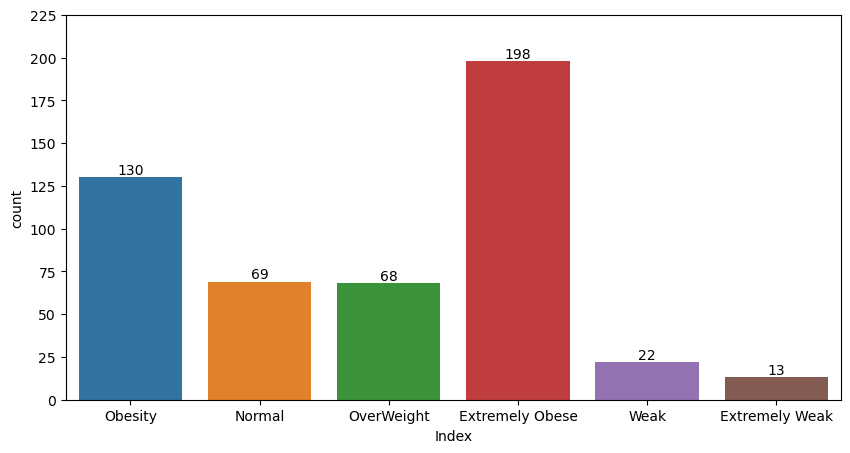

In [8]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data, x="Index")
ax.set_ylim([0, 225])
for i in ax.containers:
    ax.bar_label(i)

### Weight category distribution according to gender


STATS FOR MEN:
Index
Extremely Obese    105
Obesity             59
OverWeight          32
Normal              28
Weak                15
Extremely Weak       6
Name: count, dtype: int64

STATS FOR WOMEN:
Index
Extremely Obese    93
Obesity            71
Normal             41
OverWeight         36
Weak                7
Extremely Weak      7
Name: count, dtype: int64


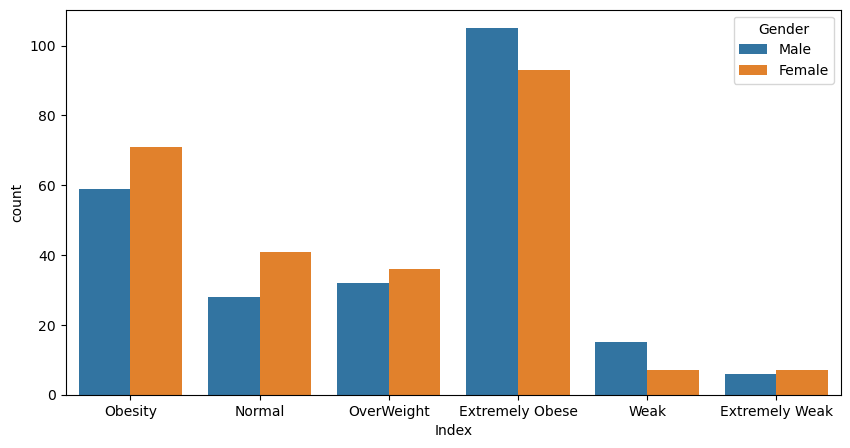

In [10]:
male = data[data["Gender"] == "Male"]["Index"].value_counts()
female = data[data["Gender"] == "Female"]["Index"].value_counts()
print(f"\nSTATS FOR MEN:\n{male}")
print(f"\nSTATS FOR WOMEN:\n{female}")
plt.figure(figsize=(10, 5))
sns.countplot(data, x="Index", hue="Gender");

## Convert the 'Gender' column to numeric

In [10]:
data2 = pd.get_dummies(data["Gender"], dtype="int", drop_first=True)
data.drop("Gender", axis=1, inplace=True)
data = pd.concat([data2,data], axis=1)
data.head()

,Male,Height,Weight,Index
0,1,174,96,Obesity
1,1,189,87,Normal
2,0,185,110,Obesity
3,0,195,104,OverWeight
4,1,149,61,OverWeight


## Matrix of features and labels

In [11]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (500, 3)
y (500,)


## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (350, 3)
X_test (150, 3)
y_train (350,)
y_test (150,)


## Scaling the features

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"\nFirst five rows of scaled X_train:\n{X_train[:5, :]}")
print(f"\nFirst five rows of scaled X_test:\n{X_test[:5, :]}")


First five rows of scaled X_train:
[[-1.01149463 -0.12067478  1.03932914]
 [ 0.98863599 -0.12067478  0.52231481]
 [ 0.98863599  0.06566128  1.25221739]
 [ 0.98863599 -1.11446713 -0.23800038]
 [ 0.98863599  1.49423777  0.27901395]]

First five rows of scaled X_test:
[[-1.01149463  1.49423777  0.91767871]
 [ 0.98863599  0.56255745  1.40428042]
 [ 0.98863599 -0.99024308  0.18777613]
 [ 0.98863599  0.00354926  0.27901395]
 [ 0.98863599  1.61846181  0.30942656]]


## Training the Random Forest Classification model with grid search

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators":[50, 100, 150, 200]}
grid_cv = GridSearchCV(RandomForestClassifier(random_state=100), param_grid, verbose=3)
grid_cv.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...................n_estimators=50;, score=0.829 total time=   0.1s
[CV 2/5] END ...................n_estimators=50;, score=0.871 total time=   0.1s
[CV 3/5] END ...................n_estimators=50;, score=0.857 total time=   0.1s
[CV 4/5] END ...................n_estimators=50;, score=0.843 total time=   0.1s
[CV 5/5] END ...................n_estimators=50;, score=0.771 total time=   0.1s
[CV 1/5] END ..................n_estimators=100;, score=0.843 total time=   0.2s
[CV 2/5] END ..................n_estimators=100;, score=0.886 total time=   0.2s
[CV 3/5] END ..................n_estimators=100;, score=0.871 total time=   0.2s
[CV 4/5] END ..................n_estimators=100;, score=0.871 total time=   0.2s
[CV 5/5] END ..................n_estimators=100;, score=0.771 total time=   0.2s
[CV 1/5] END ..................n_estimators=150;, score=0.857 total time=   0.3s
[CV 2/5] END ..................n_estimators=150;,

GridSearchCV(estimator=RandomForestClassifier(random_state=100),
             param_grid={'n_estimators': [50, 100, 150, 200]}, verbose=3)

### Best parameters

In [16]:
grid_cv.best_params_

{'n_estimators': 100}

## Predicting the test set

In [17]:
y_pred = grid_cv.predict(X_test)
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,Obesity,Obesity
1,Extremely Obese,Extremely Obese
2,Extremely Obese,Extremely Obese
3,Obesity,Obesity
4,Obesity,Obesity
5,Obesity,Obesity
6,Extremely Obese,Extremely Obese
7,OverWeight,OverWeight
8,Normal,Normal
9,Obesity,Obesity


## Evaluating the model


Classification Report:
                 precision    recall  f1-score   support

Extremely Obese       0.92      0.93      0.92        59
 Extremely Weak       1.00      0.67      0.80         3
         Normal       0.76      0.59      0.67        22
        Obesity       0.88      0.84      0.86        45
     OverWeight       0.48      0.79      0.59        14
           Weak       0.80      0.57      0.67         7

       accuracy                           0.82       150
      macro avg       0.81      0.73      0.75       150
   weighted avg       0.84      0.82      0.82       150



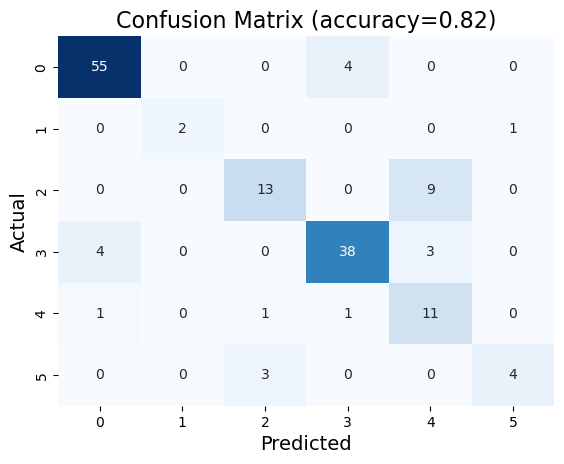

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nClassification Report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14)
ax.set_title(f"Confusion Matrix (accuracy={accuracy:.2f})", fontsize=16);

## Live prediction

In [19]:
def live_prediction(details):

    details[0] = int(details[0])
    details = np.array(details).reshape(1, -1)
    y_pred = grid_cv.predict(scaler.transform(details))
    return (y_pred[0])

In [20]:
is_male = False
height = 160
weight = 65
your_details = [is_male, height, weight]
result = live_prediction(your_details)
print(f"The person with input details is: {result}")

The person with input details is: Normal
